<a href="https://colab.research.google.com/github/felipeapgodoi/MetodosNumericos2020_3/blob/master/ComparaMetodosDeSolucao_FelipeGodoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import numpy.linalg as npla
import time
import matplotlib.pyplot as plt

In [38]:
!git clone https://github.com/felipeapgodoi/MetodosNumericos2020_3 #clonar do Github
%cd MetodosNumericos2020_3

Cloning into 'MetodosNumericos2020_3'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 69 (delta 35), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (69/69), done.
/content/MetodosNumericos2020_3/MetodosNumericos2020_3/MetodosNumericos2020_3/MetodosNumericos2020_3/MetodosNumericos2020_3/MetodosNumericos2020_3/MetodosNumericos2020_3/MetodosNumericos2020_3/MetodosNumericos2020_3/MetodosNumericos2020_3


In [39]:
from GaussPivot import gauss
from GaussSeidel import gauss_seidel
from Jacobi import jacobi

/content/MetodosNumericos2020_3/GaussSeidel.py:40: RuntimeWarning: overflow encountered in double_scalars
  x_new[i] = (f[i]-sum1-sum2)/A[i,i]
/content/MetodosNumericos2020_3/GaussSeidel.py:35: RuntimeWarning: invalid value encountered in double_scalars
  sum1 += A[i,j]*x_new[j]


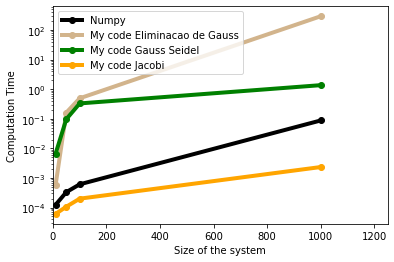

In [40]:
# size of the matrix to be calculated
SIZE = [10,50,100,1000]

# create list
cpu_time_numpy = []
cpu_time_mycodeeliminacaodegauss = []
cpu_time_mycodegaussseidel = []
cpu_time_mycodejacobi = []


# loop over the size
for size in SIZE :
  # create the system
  A = np.random.rand(size,size)
  f = np.random.rand(size)
  # nummpy
  t0 = time.clock()
  w=npla.solve(A,f)
  cpu_time_numpy.append(time.clock()-t0)

  # mycodeeliminacaodegauss
  t0 = time.clock()
  x= gauss(A,f)
  cpu_time_mycodeeliminacaodegauss.append(time.clock()-t0)

  # mycodegaussseidel
  t0 = time.clock()
  x0= np.random.rand(size)
  y = gauss_seidel(A,f,x0)
  cpu_time_mycodegaussseidel.append(time.clock()-t0)

  # mycodejacobi
  t0 = time.clock()
  z = jacobi(A,f,x)
  cpu_time_mycodejacobi.append(time.clock()-t0)

# plot the results
plt.semilogy(SIZE,cpu_time_numpy,'o-',linewidth=4, color='black',label='Numpy')
plt.semilogy(SIZE,cpu_time_mycodeeliminacaodegauss,'o-',linewidth=4, color='tan',label='My code Eliminacao de Gauss')
plt.semilogy(SIZE,cpu_time_mycodegaussseidel,'o-',linewidth=4, color='green',label='My code Gauss Seidel')
plt.semilogy(SIZE,cpu_time_mycodejacobi,'o-',linewidth=4, color='orange',label='My code Jacobi')

plt.xlabel('Size of the system'  )
plt.ylabel('Computation Time')
plt.xlim([0,1250])
plt.legend(loc=2)
plt.show()